In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Linear regression using `numpy` and `tf.GradientTape`

In [2]:
# Define loss function
def abs_loss(y_actual, y_pred):
    return tf.abs(y_actual - y_pred)

In [3]:
# Create fake training data
x_train = np.arange(0, 21, 1)
y_train = 10 * x_train + 5

In [4]:
# Create tf variables
a = tf.Variable(np.random.normal(1), trainable = True)
b = tf.Variable(np.random.normal(1), trainable = True)

In [5]:
# Define a single training step

def training_step(x, y, lr = .001):
    
    with tf.GradientTape(persistent = True) as tape:
        
        # Make a prediction
        y_pred = a * x + b
        
        # Compute loss
        _loss = abs_loss(y, y_pred)
        
        # Get gradients
        grad_a, grad_b = tape.gradient(_loss, (a, b))
        
        # Upadate variables 
        a.assign_sub(grad_a * lr)
        b.assign_sub(grad_b * lr)
        
    return tf.reduce_mean(_loss).numpy(), grad_a, grad_b

In [6]:
# Train in a loop
EPOCHS = 5000
LR = 6e-4

losses = []
gradients_a = []
gradients_b = []


for i in range(EPOCHS):
    
    loss, grad_a, grad_b = training_step(x_train, y_train, LR)
    
    losses.append(loss)
    gradients_a.append(grad_a)
    gradients_b.append(grad_b)
    
    if i % 100 == 0:
        
        # LR decay
        LR *= .9
        
        print(f'Epoch: {i}')
        print(f'Loss: {loss}')
        print(f'LR: {LR}')
    
print(f'\nActual coefs: y = 10 * x + 5')    
print(f'Learned coefs: y = {a.numpy()} * x + {b.numpy()}')

Epoch: 0
Loss: 95.66603088378906
LR: 0.00054
Epoch: 100
Loss: 0.8187689781188965
LR: 0.000486
Epoch: 200
Loss: 0.6416455507278442
LR: 0.0004374
Epoch: 300
Loss: 0.5473188757896423
LR: 0.00039366
Epoch: 400
Loss: 0.3536519408226013
LR: 0.000354294
Epoch: 500
Loss: 0.2618695795536041
LR: 0.0003188646
Epoch: 600
Loss: 0.5759122967720032
LR: 0.00028697814
Epoch: 700
Loss: 0.33303219079971313
LR: 0.000258280326
Epoch: 800
Loss: 0.3132888972759247
LR: 0.0002324522934
Epoch: 900
Loss: 0.36554232239723206
LR: 0.00020920706406
Epoch: 1000
Loss: 0.4252711236476898
LR: 0.000188286357654
Epoch: 1100
Loss: 0.3223661184310913
LR: 0.0001694577218886
Epoch: 1200
Loss: 0.29538941383361816
LR: 0.00015251194969974
Epoch: 1300
Loss: 0.2597486078739166
LR: 0.000137260754729766
Epoch: 1400
Loss: 0.22795318067073822
LR: 0.00012353467925678942
Epoch: 1500
Loss: 0.19908194243907928
LR: 0.00011118121133111048
Epoch: 1600
Loss: 0.17310717701911926
LR: 0.00010006309019799944
Epoch: 1700
Loss: 0.1497289538383484
L

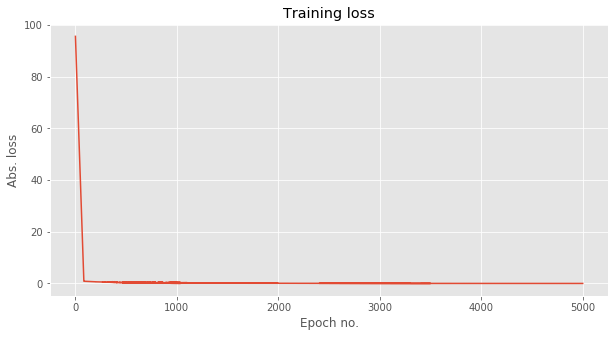

In [12]:
# Plot loss
plt.figure(figsize = (10, 5))
plt.plot(losses)
plt.xlabel('Epoch no.')
plt.ylabel('Abs. loss')
plt.title('Training loss')
plt.show()

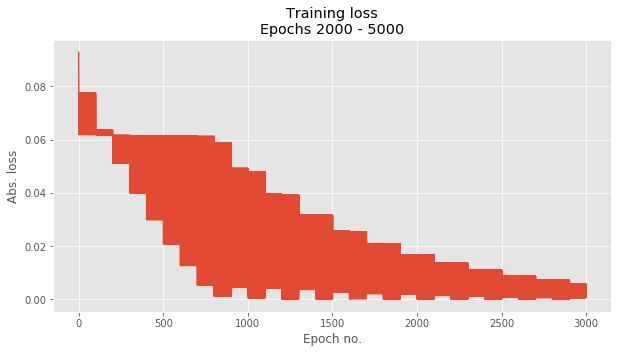

In [13]:
# Plot loss
plt.figure(figsize = (10, 5))
plt.plot(losses[2000:])
plt.xlabel('Epoch no.')
plt.ylabel('Abs. loss')
plt.title('Training loss\nEpochs 2000 - 5000')
plt.show()

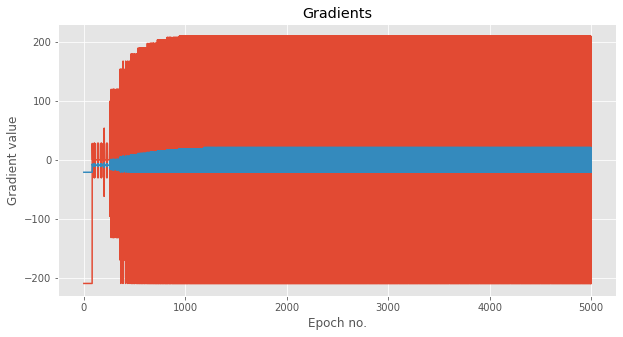

In [8]:
# Plot gradients
plt.figure(figsize = (10, 5))
plt.plot(gradients_a, label = 'Gradients for a')
plt.plot(gradients_b, label = 'Gradients for b')
plt.xlabel('Epoch no.')
plt.ylabel('Gradient value')
plt.title('Gradients')
plt.show()